### This Project implements the application of K-means Clustering Algorithm to implement it on the distributed dataset of the customers

**the dataset is mall customer data segmentation**


In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing the datafrmae then we will import the necessary model 
customerdf = pd.read_csv("Mall_Customers.csv")

In [4]:
customerdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


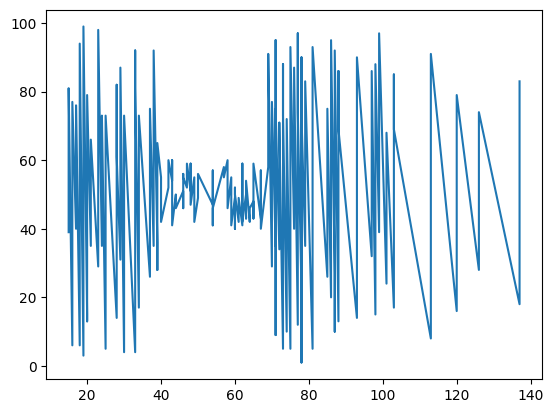

In [13]:
# now we need to plot some figues to understand how the data is divided 
plt.plot(customerdf['Annual Income (k$)'], customerdf['Spending Score (1-100)'])
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

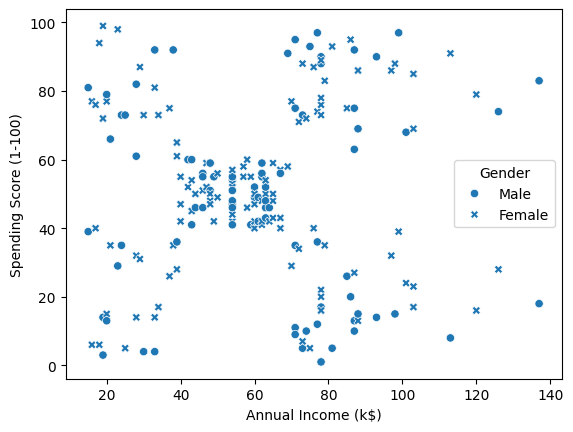

In [17]:
# now Plotting Scatter plot to under stand the data
sns.scatterplot(
    data = customerdf,
    x = 'Annual Income (k$)',
    y = 'Spending Score (1-100)',
    style = "Gender"
)

In [18]:
# We need to do label encoding before we pass it to the model for training
# importing label encoder
from sklearn.preprocessing import LabelEncoder

In [20]:
label = LabelEncoder()
# initialising the method in a variable

In [21]:
customerdf.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
# thank goodness

In [23]:
gender_labels = label.fit_transform(customerdf['Gender'])
gender_labels

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [24]:
# 1 ---> male 
# 2 ---> Female

In [25]:
customerdf['gender_label'] = gender_labels

In [26]:
customerdf

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),gender_label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [27]:
# dropping the old Gender as it may confuse the model
customerdf.drop('Gender', axis = 1)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),gender_label
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [29]:
# now creating 'X', and standardly divinding the dataset into number of points which we can then pass into an model
X = customerdf.iloc[:, [3,4]].values

In [53]:
print(X)
print(X.shape)

(200, 2)


In [32]:
# importing the k means library
from sklearn.cluster import KMeans

In [35]:
# using the elbow graph to find out how many clusters we actually need
# fidning out the WCSS for different number of clusters
wcss = []
for i in range(1,11) :
    kmean = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmean.fit(X)
    wcss.append(kmean.inertia_)

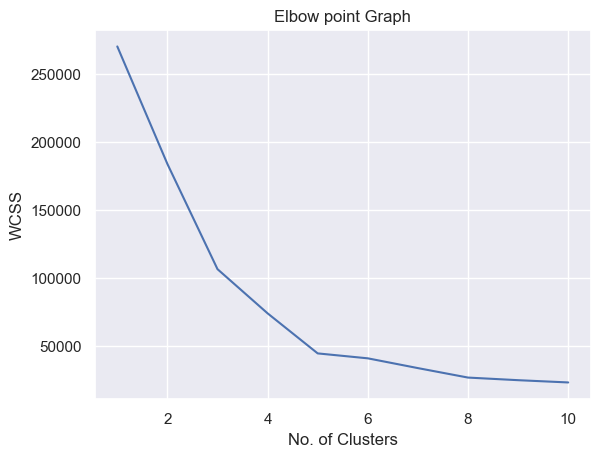

In [52]:
plt.plot(range(1,11), wcss)
sns.set()
plt.title('Elbow point Graph')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters')
plt.show()

In [42]:
# We can take the number of clusters as 5 but for sake of learning I am taking it as 8


In [44]:
# Training KMeans Clustering Model
kmean = KMeans(n_clusters = 8, init = 'k-means++', random_state = 0)

# this will return a label array which will contain a label for each cluster that we will have
Y = kmean.fit_predict(X)
print(Y)

[3 4 7 4 3 4 7 4 7 4 7 4 7 4 7 4 3 4 3 4 3 4 7 4 7 4 3 4 3 4 7 4 7 4 7 4 7
 4 3 4 3 4 3 6 3 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 0 6 6 0 0 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 5 2 1 2 5 2 5 2 5 5 5 5 5]


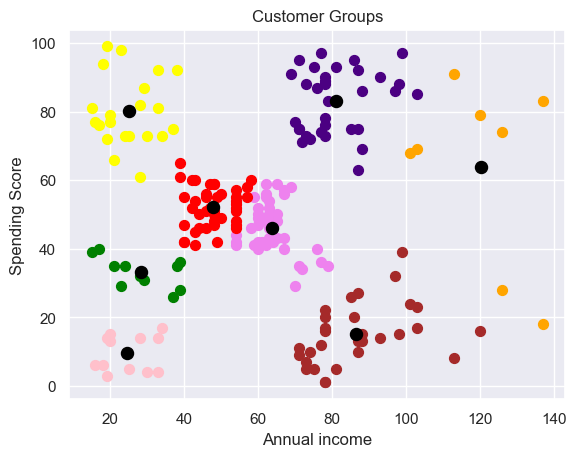

In [50]:
# Plotting all the clusters and thier centroids
plt.scatter(X[Y == 0,0], X[Y == 0,1], s = 50, c = 'violet', label = 'Cluster 1')
plt.scatter(X[Y == 1,0], X[Y == 1,1], s = 50, c = 'indigo', label = 'Cluster 2')
plt.scatter(X[Y == 2,0], X[Y == 2,1], s = 50, c = 'brown', label = 'Cluster 3')
plt.scatter(X[Y == 3,0], X[Y == 3,1], s = 50, c = 'green', label = 'Cluster 4')
plt.scatter(X[Y == 4,0], X[Y == 4,1], s = 50, c = 'yellow', label = 'Cluster 5')
plt.scatter(X[Y == 5,0], X[Y == 5,1], s = 50, c = 'orange', label = 'Cluster 6')
plt.scatter(X[Y == 6,0], X[Y == 6,1], s = 50, c = 'red', label = 'Cluster 7')
plt.scatter(X[Y == 7,0], X[Y == 7,1], s = 50, c = 'pink', label = 'Cluster 8')

# Plotting the centroids
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 75, c = 'black')
plt.title('Customer Groups')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.show()